In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact
from ipywidgets import interact_manual

### 一、數據曲線走向的預測

#### 建立假數據

In [27]:
x = np.linspace(0,5,50)
y = 1.2 * x + 0.8 + 0.6 * np.random.randn(50)

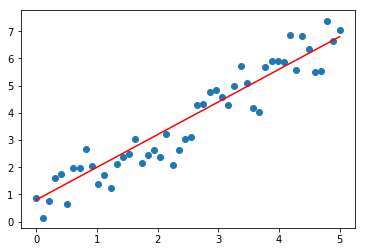

In [28]:
plt.scatter(x,y)
plt.plot(x,1.2 * x + 0.8,'r')

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regr = LinearRegression()

In [31]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [32]:
#將X設為50x1的矩陣
X = x.reshape(50,1)

In [33]:
X

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [34]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
Y = regr.predict(X)

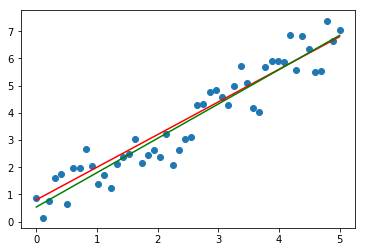

In [37]:
plt.scatter(x,y)
plt.plot(x,1.2 * x + 0.8,'r')
plt.plot(X,Y,'g')

## 二、畫出等高線圖

In [48]:
def height(x, y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

In [49]:
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)

#### 將資料變成網格資料

In [50]:
X,Y = np.meshgrid(x,y)

<a list of 9 text.Text objects>

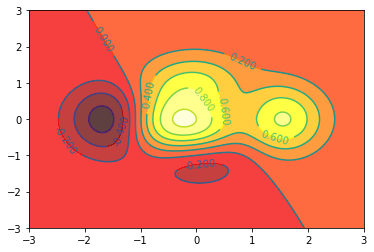

In [65]:
#顏色，hot顏色為暖色
plt.contourf(X,Y,height(X,Y),8,alpha=0.75,cmap='hot')
#加上contour lines
C = plt.contour(X,Y,height(X,Y),8,color='black',lw=0.8)
#顯示等高線的數值
plt.clabel(C,inline=True,fontsize=10)

## 三、劃出三維圖

In [13]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [54]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
z = np.sin(X**3 + Y**2) / (X**2 + Y**2)

In [55]:
print(X)
print(Y)

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]
[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]


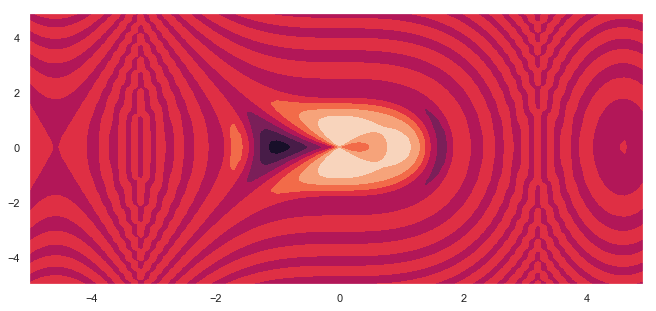

In [56]:
h = plt.contourf(x,y,z)

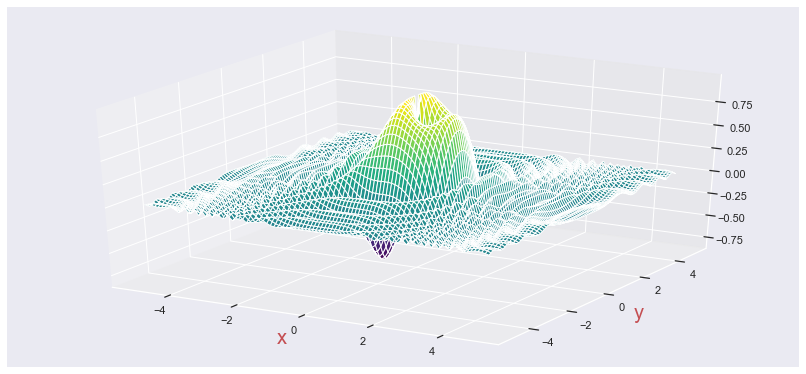

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('x',fontsize=20,color='r')
plt.ylabel('y',fontsize=20,color='r')
ax.plot_surface(X,Y, z, rstride=1, cstride=1, cmap='viridis')
plt.show()

## 四、視覺化歷年惡性腫瘤發生率(攝護腺癌、肺癌 、大腸直腸癌、女性乳癌、子宮頸癌)

In [64]:
df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=14425&md5_url=8712c2239ed620ef13120dbbfd77d948')

In [65]:
df

,依年度別分by year,攝護腺癌Prostate Cancer(每十萬人),肺癌Lung Cancer(每十萬人),大腸直腸癌Colorectal Cancer(每十萬人),女性乳癌Female Breast Cancer(每十萬人),子宮頸癌Cervical Cancer(每十萬人)
0,2000,17.7,30.7,33.9,39.9,25.4
1,2001,17.6,30.1,32.6,40.5,21.5
2,2002,18.9,30.3,34.1,41.3,17.9
3,2003,17.7,29.5,33.7,42.4,16.7
4,2004,21.1,32.3,38.5,48.5,18.1
5,2005,20.5,32.4,37.6,50.3,15.1
6,2006,22.6,32.5,38.4,51.2,13.6
7,2007,24.3,33.8,39.2,55.4,12.8
8,2008,25.2,33.5,39.1,57.8,12.2
9,2009,27.5,35.9,42.4,61.4,12.0


In [66]:
df.index = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
df.drop(['依年度別分by year'],axis=1,inplace=True)
df.columns=['Prostate Cancer','Lung Cancer','Colorectal Cancer','Female Breast Cancer','Cervical Cancer']

In [67]:
df

,Prostate Cancer,Lung Cancer,Colorectal Cancer,Female Breast Cancer,Cervical Cancer
2000,17.7,30.7,33.9,39.9,25.4
2001,17.6,30.1,32.6,40.5,21.5
2002,18.9,30.3,34.1,41.3,17.9
2003,17.7,29.5,33.7,42.4,16.7
2004,21.1,32.3,38.5,48.5,18.1
2005,20.5,32.4,37.6,50.3,15.1
2006,22.6,32.5,38.4,51.2,13.6
2007,24.3,33.8,39.2,55.4,12.8
2008,25.2,33.5,39.1,57.8,12.2
2009,27.5,35.9,42.4,61.4,12.0


<Figure size 3600x3600 with 0 Axes>

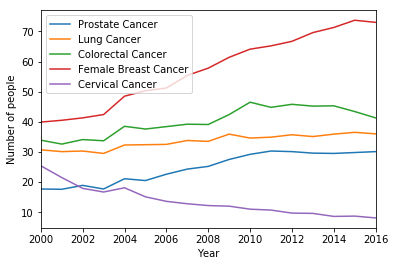

<Figure size 3600x3600 with 0 Axes>

In [68]:
df.plot();
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.figure(figsize=(50,50))